In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob


In [6]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])   # use read_excel if xlsx
df.head()


Saving student_feedback.csv to student_feedback (1).csv


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [8]:
# Remove unnecessary index column if present
df = df.drop(columns=df.columns[0])

# Check for missing values
df.isnull().sum()


,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [9]:
# Ensure all ratings are numeric
df = df.apply(pd.to_numeric, errors='coerce')


In [10]:
rating_cols = df.columns[1:]  # excluding Student ID
rating_cols


Index(['Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [11]:
df["Overall_Score"] = df[rating_cols].mean(axis=1)
df.head()


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Score
0,340,5,2,7,6,9,2,1,8,5.000
1,253,6,5,8,6,2,1,2,9,4.875
2,680,7,7,6,5,4,2,3,1,4.375
3,806,9,6,7,1,5,9,4,6,5.875
4,632,8,10,8,4,6,6,9,9,7.500


In [12]:
avg_scores = df[rating_cols].mean().sort_values(ascending=False)
avg_scores


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


In [13]:
avg_scores = df[rating_cols].mean().sort_values(ascending=False)
avg_scores


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


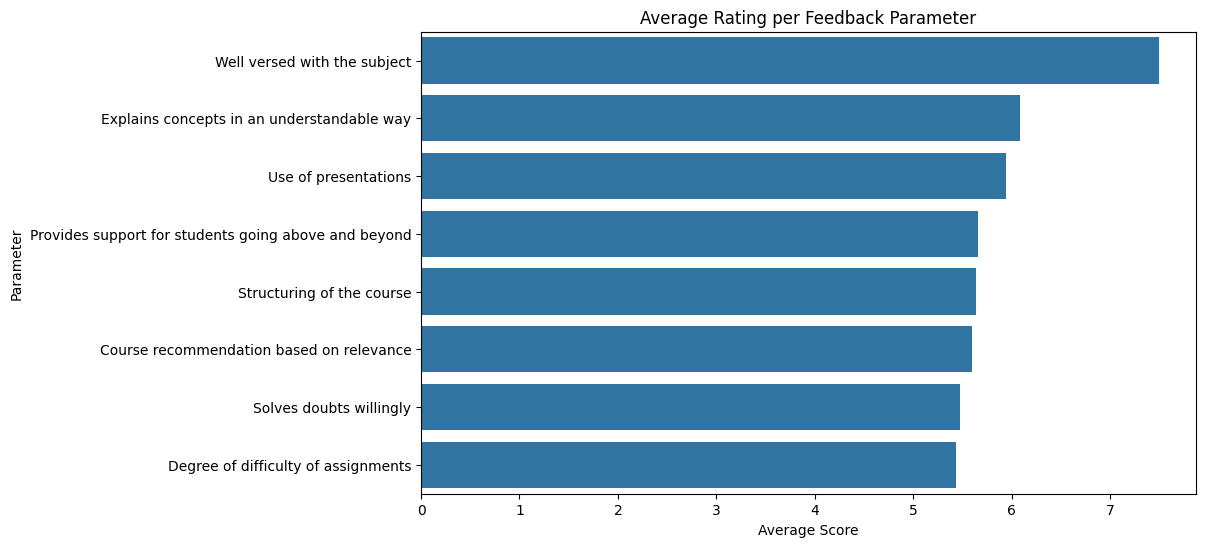

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index)
plt.title("Average Rating per Feedback Parameter")
plt.xlabel("Average Score")
plt.ylabel("Parameter")
plt.show()


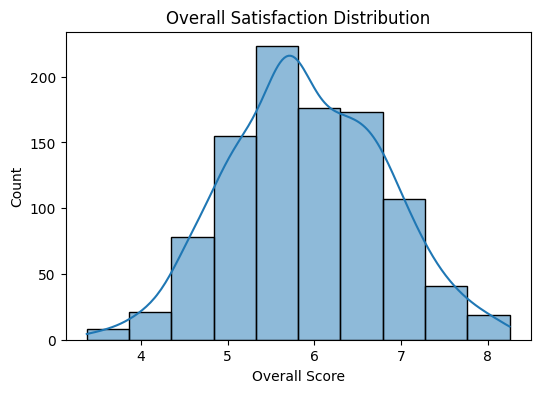

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df["Overall_Score"], bins=10, kde=True)
plt.title("Overall Satisfaction Distribution")
plt.xlabel("Overall Score")
plt.show()


In [16]:
strengths = avg_scores[avg_scores >= 7]
weaknesses = avg_scores[avg_scores < 7]

strengths, weaknesses


(Well versed with the subject    7.497502
 dtype: float64,
 Explains concepts in an understandable way              6.081918
 Use of presentations                                    5.942058
 Provides support for students going above and beyond    5.662338
 Structuring of the course                               5.636364
 Course recommendation based on relevance                5.598402
 Solves doubts willingly                                 5.474525
 Degree of difficulty of assignments                     5.430569
 dtype: float64)

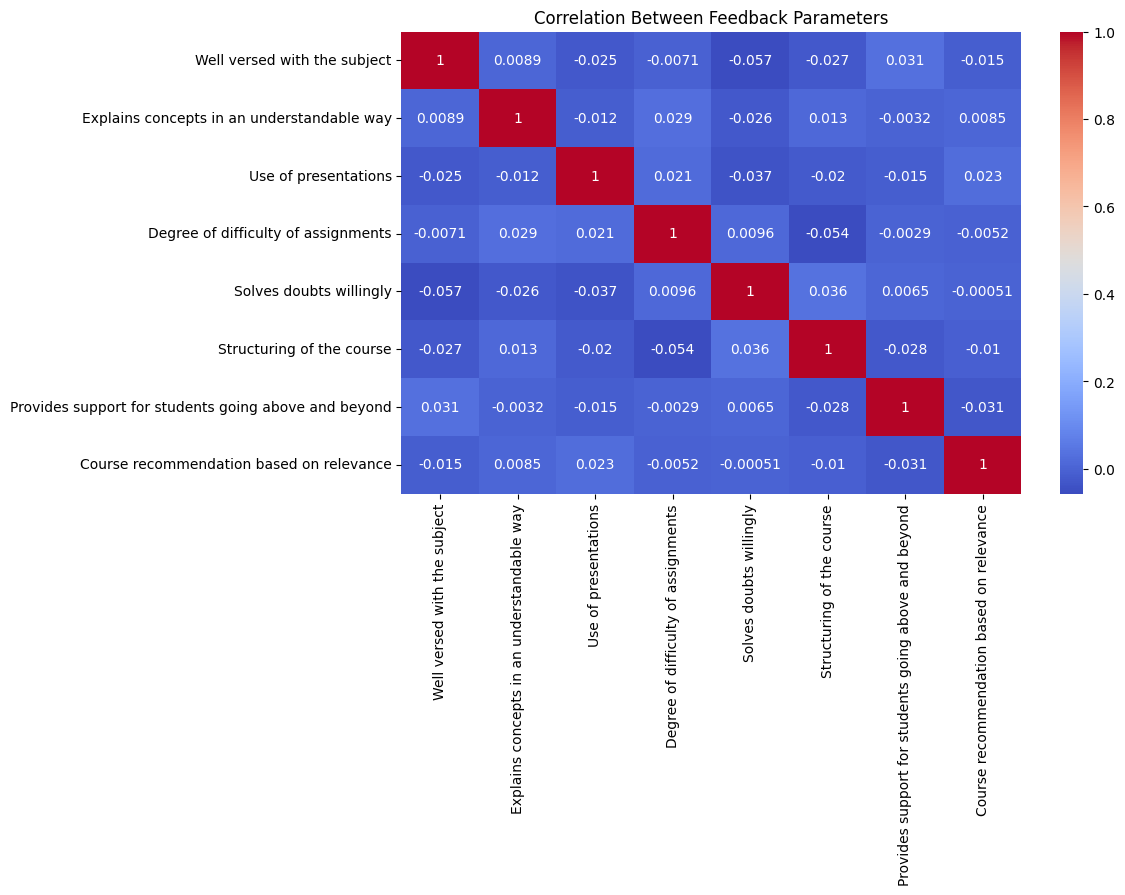

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Feedback Parameters")
plt.show()
